In [1]:
import pandas as pd
import numpy as np

In [5]:
data = pd.read_csv("C:/Users/hp/Desktop/blinkit_data.csv")

In [6]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


### checking..., cleaning

In [7]:
data.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [12]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [15]:
#when you want to see the rows that contains the nan values, df.isnull shows the nans. any refer to diplayng of the rows that contain any nan value, axis=1 tells it tp print the rows.
df[df.isnull().any(axis=1)]

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0
10,LF,FDX21,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.084555,NaN,109.8912,5.0
14,Low Fat,FDH19,Meat,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.032928,NaN,173.1738,5.0
18,Low Fat,FDJ56,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.182515,NaN,98.7700,5.0
20,Regular,FDZ07,Fruits and Vegetables,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,60.2194,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


### analysing the missing vales column with different approach

In [24]:
print(df['Item Weight'].skew()) #skew = 0 : symmetric
print(df['Item Weight'].kurt()) #kurt = 3 : normal, <3: data is spread out, has less outliers, >3: has outliers and its more concentrated towards the mean


0.08242620912212258
-1.2277664144376634


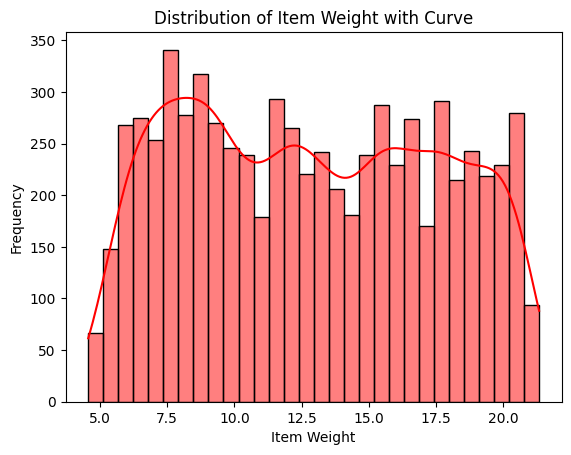

In [18]:
#ist more on a visual side, wecan say that its not a normal ditribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Item Weight'].dropna(), kde=True, bins=30, color='red')
plt.title('Distribution of Item Weight with Curve')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()


In [21]:
df['Item Weight'].isnull().mean()*100

np.float64(17.165317376510618)

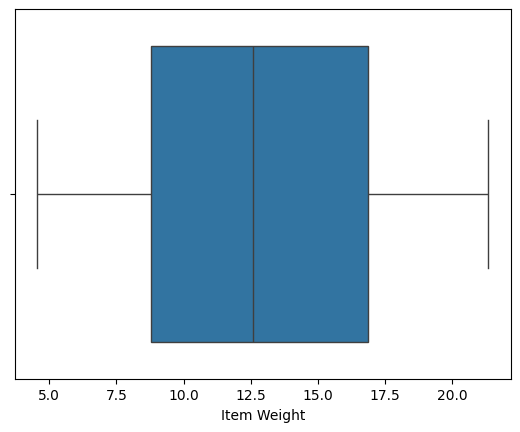

In [22]:
sns.boxplot(x=df['Item Weight'])
plt.show()

#shapiro walk: This is an actual normality test
from scipy.stats import shapiro

stat, p = shapiro(df['Item Weight'].dropna())
print('Statistic:', stat)
print('p-value:', p)
If p > 0.05 →  Data looks normal

If p ≤ 0.05 →  Data is not normal

import scipy.stats as stats

stats.probplot(df['Item Weight'].dropna(), dist="norm", plot=plt)
plt.show()
What to look for:

If the dots follow a straight diagonal line, the data is normal.

Curved or scattered pattern = not normal.



In [23]:
df['Item Type'].value_counts()


Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [36]:
data['Item Weight'] = data.groupby('Item Type')['Item Weight'].transform(lambda x: x.fillna(x.mean()))

In [37]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


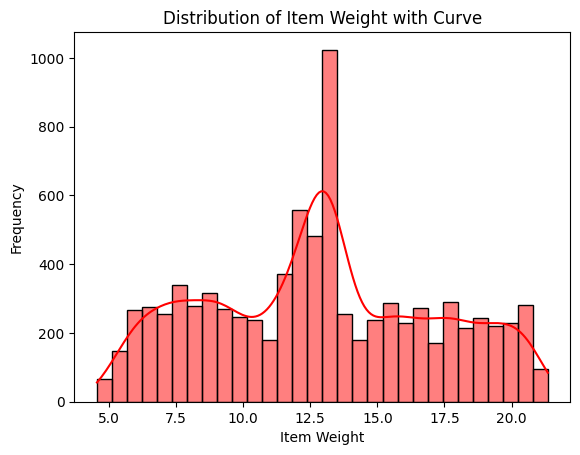

In [38]:
sns.histplot(data['Item Weight'], bins = 30, kde = True, color='red')
plt.title('Distribution of Item Weight with Curve')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

In [39]:
print(data['Item Weight'].skew())

0.08953650207100473


In [40]:
data.isnull().sum()

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  0
Sales                        0
Rating                       0
dtype: int64

In [42]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [43]:
data['Item Fat Content'] = data['Item Fat Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [46]:
print(data['Item Fat Content'].unique())

['Regular' 'Low Fat']


### KPI REQUIREMENT

In [54]:
total_sales = data['Sales'].sum()
print(f"the overall revenue generatd from all the items sold are: ${total_sales}")

the overall revenue generatd from all the items sold are: $1201681.4808


In [60]:
average_sales = data['Sales'].mean()
print(f" teh average sale is: ${average_sales}")

 teh average sale is: $140.9927819781767


In [62]:
item_sold = data['Item Identifier'].count()
print(F"the total count of item sold are: {item_sold}")

the total count of item sold are: 8523


In [65]:
avg_rating = data['Rating'].mean()
print(f"the average rating of the item sold are: {avg_rating}")

the average rating of the item sold are: 3.965857092573038


### CHARTS REQUIREMENT

In [69]:
sales_by_fat = data.groupby('Item Fat Content')['Sales'].sum().reset_index()
sales_by_fat

,Item Fat Content,Sales
0,Low Fat,776319.6784
1,Regular,425361.8024


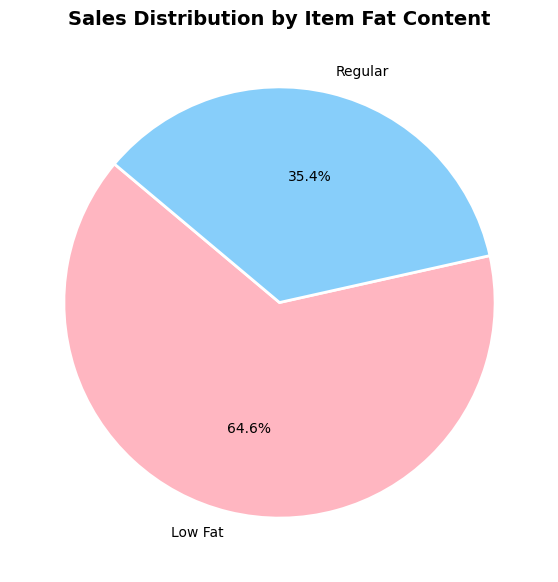

In [70]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(7,7))  # Size of the chart

plt.pie(
    sales_by_fat['Sales'],                # Values (total sales)
    labels=sales_by_fat['Item Fat Content'],  # Labels (fat types)
    autopct='%1.1f%%',                    # Shows percentage on chart
    startangle=140,                       # Rotates the start angle
    colors=['#FFB6C1', '#87CEFA', '#90EE90'],  # Cute pastel colors
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  # White border between slices
)

plt.title('Sales Distribution by Item Fat Content', fontsize=14, fontweight='bold')
plt.show()


In [71]:
sales_by_item = data.groupby('Item Type')['Sales'].sum().reset_index()
sales_by_item

,Item Type,Sales
0,Baking Goods,81894.7364
1,Breads,35379.1198
2,Breakfast,15596.6966
3,Canned,90706.7270
4,Dairy,101276.4596
5,Frozen Foods,118558.8814
6,Fruits and Vegetables,178124.0810
7,Hard Drinks,29334.6766
8,Health and Hygiene,68025.8388
9,Household,135976.5254


C:\Users\hp\AppData\Local\Temp\ipykernel_1412\3867288022.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Sales', data=sales_by_item, palette='crest')


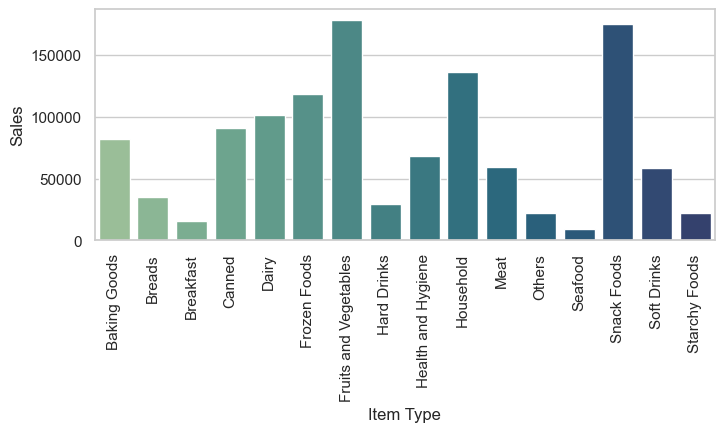

In [87]:
sns.set_theme(style='whitegrid')

plt.figure(figsize=(8,3))
sns.barplot(x='Item Type', y='Sales', data=sales_by_item, palette='crest')
plt.xticks(rotation='vertical')   # rotate x-axis labels
plt.show()


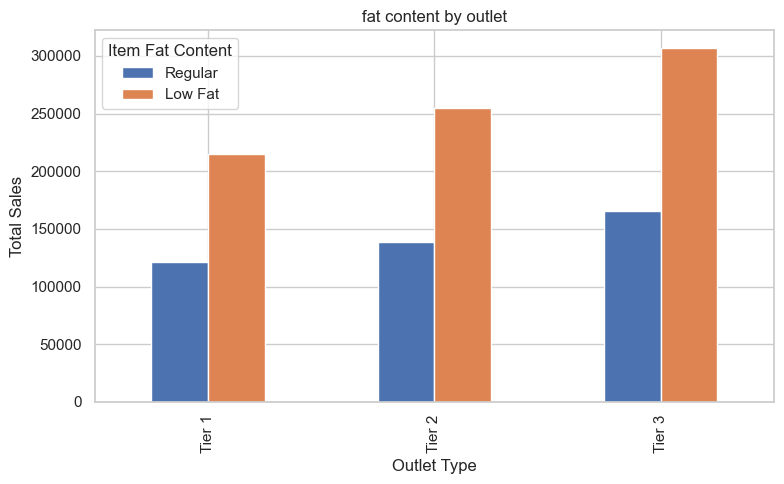

In [83]:
grouped = data.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]
sns.color_palette("rocket_r", as_cmap=True)
ax =  grouped.plot(kind = 'bar', figsize = (8,5))
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.title('fat content by outlet')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

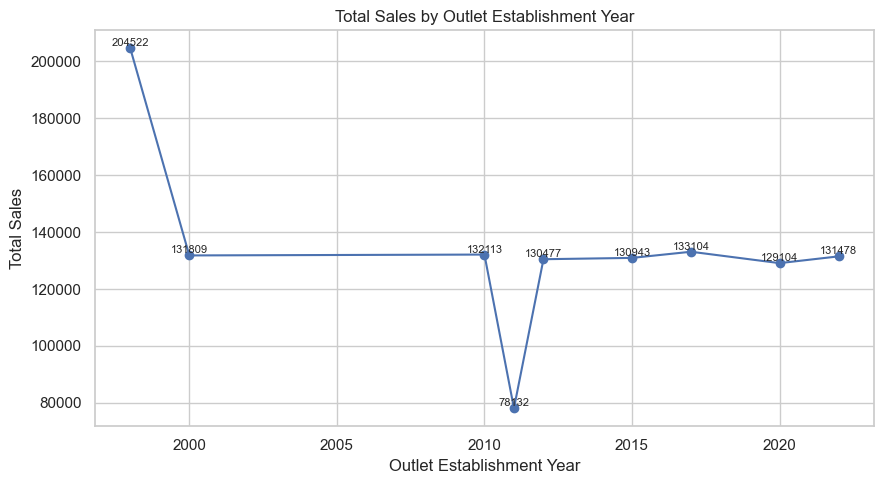

In [90]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [112]:
sales_by_outletsize = data.groupby('Outlet Size')['Sales'].sum().reset_index()
sales_by_outletsize

,Outlet Size,Sales
0,High,248991.5840
1,Medium,507895.7284
2,Small,444794.1684


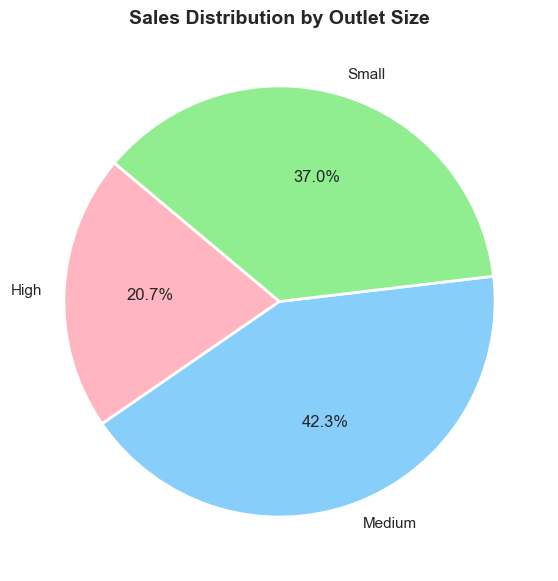

In [115]:


# Pie chart
plt.figure(figsize=(7,7))  # Chart size

plt.pie(
    sales_by_outletsize['Sales'],                 # Values (total sales)
    labels=sales_by_outletsize['Outlet Size'],    # Labels (outlet sizes)
    autopct='%1.1f%%',                   # Show percentages
    startangle=140,                      # Rotate start angle
    colors=['#FFB6C1', '#87CEFA', '#90EE90'],  # Cute pastel colors
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  # White border
)

plt.title('Sales Distribution by Outlet Size', fontsize=14, fontweight='bold')
plt.show()


In [116]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()


In [117]:
sales_by_location

,Outlet Location Type,Sales
0,Tier 1,336397.8120
1,Tier 2,393150.6416
2,Tier 3,472133.0272


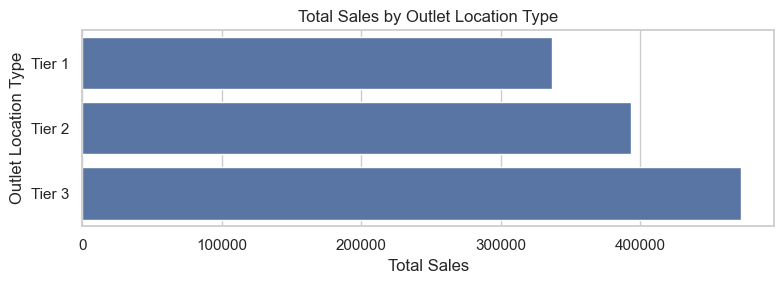

In [118]:
plt.figure(figsize=(8, 3))
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)
plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()
plt.show()
